 # **СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ**

# Раздел 1: Импорт библиотек и установка цветовых параметров

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Чтобы графики располагались на одной линии используем функцию subplots из библиотеки matplotlib
import seaborn as sns

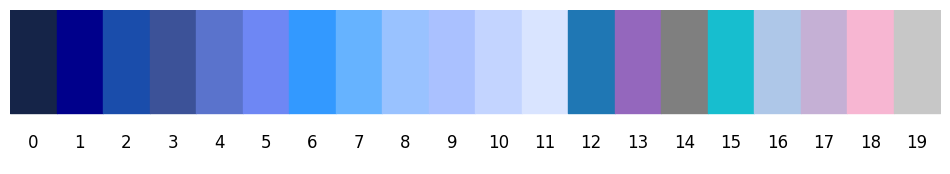

In [ ]:
# ЦВЕТОВАЯ ПОЛИТРА ГРАФИКОВ
# Палитра цветов с индексами
contrast_colors = [
    '#152448',  # 0 Глубокий темный синий
    '#00008B',  # 1 Классический темный синий
    '#1A4DAB',  # 2 Тёмно-индиго
    '#3c5298',  # 3 Глубокий синий
    '#5A73CC',  # 4 Умеренно-синий
    '#6e87f4',  # 5 Светло-синий
    '#3399ff',  # 6 Темный синий
    '#66b3ff',  # 7 Яркий синий
    '#99c2ff',  # 8 Светлый синий
    '#aac1ff',  # 9 Нежно-голубой
    '#c3d4ff',  # 10 Ледяной голубой
    '#d9e4ff',  # 11 Пастельный голубой
    '#1f77b4',  # 12 Стандартный синий
    '#9467bd',  # 13 Лиловый
    '#7f7f7f',  # 14 Серый
    '#17becf',  # 15 Лазурный
    '#aec7e8',  # 16 Нежный голубой
    '#c5b0d5',  # 17 Светлый лиловый
    '#f7b6d2',  # 18 Розовый
    '#c7c7c7',  # 19 Светло-серый
]

# (СПРАВОЧНО) color='orangered',  # Явно укажим иной контрастный цвет для другого графика

# Проверяем палитру и расширяем её при необходимости
if len(contrast_colors) < 18:
    contrast_colors = (contrast_colors * (18 // len(contrast_colors) + 1))[:18]

# Устанавливаем размер фигуры
plt.figure(figsize=(12, 2))

# Цикл по каждому цвету для отрисовки квадратов с индексами
for i, color in enumerate(contrast_colors):
    plt.fill_between([i, i + 1], 0, 1, color=color)  # Рисуем цветной прямоугольник
    plt.text(i + 0.5, -0.3, str(i), ha='center', va='center', fontsize=12, color='black')  # Индекс под цветом

# Настройка осей
plt.xlim(0, len(contrast_colors))
plt.ylim(-0.5, 1)
plt.axis('off')  # Убираем оси

# Показ графика
plt.show()

# Раздел 2: Источник информации и его обработка

### 1 . Получение источника информации

In [ ]:
# Загружаем данные файла bank_clients_transactions.csv
df = pd.read_csv('/content/drive/MyDrive/ПОРТФОЛИО/портфолио Метрики/Методы сегментации и персонализации/User_Data_Dataset.csv')

# Проверим первые 5 строк для общего понимания структуры данных
df.head()


,UserID,Country,City,DeviceType,OS,TrafficSource,TimeOnSite,PagesViewed,ItemsInCart,Purchases
0,1,UK,Birmingham,Laptop,macOS,Direct,17.23,4,0,0
1,2,India,Delhi,Tablet,Windows,Search Engines,6.00,3,0,0
2,3,France,Lyon,Laptop,iOS,Social Networks,16.67,3,1,0
3,4,Canada,Toronto,Laptop,Windows,Search Engines,14.49,9,5,4
4,5,Germany,Frankfurt,Desktop,Windows,Direct,15.84,8,0,0


### 2 . Удаление дубликатов

In [ ]:
# Проведем проверку и удалим дубликаты, если они есть
df = df.drop_duplicates()


### 3 . Приведение столбцов к стилю snake_case.

In [ ]:
# Функция для автоматического преобразования названий колонок в snake_case (стиль написания)
def snake_case(s):
    return s.lower().replace(' ', '_')  # Преобразуем в нижний регистр и заменяем пробелы на подчеркивания

# Применим к каждому названию столбца, используем метод rename() с функцией lambda
df = df.rename(columns=lambda x: snake_case(x))

# Проверим результат
print("Измененные названия колонок в стиле snake_case:")
print(df.columns)
df.info()

Измененные названия колонок в стиле snake_case:
Index(['userid', 'country', 'city', 'devicetype', 'os', 'trafficsource',
       'timeonsite', 'pagesviewed', 'itemsincart', 'purchases'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         200 non-null    int64  
 1   country        200 non-null    object 
 2   city           200 non-null    object 
 3   devicetype     200 non-null    object 
 4   os             200 non-null    object 
 5   trafficsource  200 non-null    object 
 6   timeonsite     200 non-null    float64
 7   pagesviewed    200 non-null    int64  
 8   itemsincart    200 non-null    int64  
 9   purchases      200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


###  4 . Преобразование времени

In [ ]:
# Шаг 1: Преобразование времени в десятичном формате
# Функция для преобразования времени из формата 'минуты.секунды' в десятичные минуты (float)
def convert_time_to_float(time):
    minutes = int(time)
    seconds = (time - minutes) * 100
    return minutes + seconds / 60

# Преобразуем столбец 'timeonsite' в десятичный формат (минуты в float)
df['timeonsite'] = df['timeonsite'].astype(float).apply(convert_time_to_float)

# Шаг 2: функция преобразования времени из десятичного формата в «ММ:СС» для отображения
# Функция для преобразования десятичных минут в формат 'ММ:СС'
def format_time(minutes_float):
    minutes = int(minutes_float)
    seconds = round((minutes_float - minutes) * 60)
    return f"{minutes}:{seconds:02}"


### 5 . Информация о источнике информации

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         200 non-null    int64  
 1   country        200 non-null    object 
 2   city           200 non-null    object 
 3   devicetype     200 non-null    object 
 4   os             200 non-null    object 
 5   trafficsource  200 non-null    object 
 6   timeonsite     200 non-null    float64
 7   pagesviewed    200 non-null    int64  
 8   itemsincart    200 non-null    int64  
 9   purchases      200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
print("Уникальные страны:")
unique_countries = df['country'].unique()
print(unique_countries)
print("Уникальные города:")
unique_city = df['city'].unique()
print(unique_city)


Уникальные страны:
['UK' 'India' 'France' 'Canada' 'Germany' 'USA']
Уникальные города:
['Birmingham' 'Delhi' 'Lyon' 'Toronto' 'Frankfurt' 'Munich' 'Montreal'
 'Bangalore' 'London' 'Manchester' 'New York' 'Mumbai' 'Marseille'
 'Berlin' 'Paris' 'Los Angeles' 'Vancouver' 'Chicago']


# Раздел 3: Сигментируем пользователей и расчитываем показатели

По каждому из сегментов рассчитаем показатели:
- Среднее время, проведенное на сайте  (**mean_timeonsite**)

- Среднее количество просмотренных страниц (**mean_pagesviewed**)

- Общее количество покупок (**total_purchases**)

- Общее количество товаров в корзине (**total_itemsincart**)

- Конверсия (отношение количества покупок к количеству добавлений в корзине (**conversion_rate**)


## 1 . Сигментация по географическому признаку (стран, город)

In [ ]:
# Рассчитаем метрики по странам и городам
geo_metrics = df.groupby(['country', 'city']).agg(
    mean_timeonsite=('timeonsite', 'mean'),
    mean_pagesviewed=('pagesviewed', 'mean'),
    total_purchases=('purchases', 'sum'),
    total_itemsincart=('itemsincart', 'sum')
)

# Конверсия = кол-во покупок / кол-во товаров в корзине
geo_metrics['conversion_rate'] = geo_metrics['total_purchases'] / geo_metrics['total_itemsincart']

# Округляем средние значения до 2 знаков после запятой
geo_metrics['mean_timeonsite'] = geo_metrics['mean_timeonsite'].round(2)
geo_metrics['mean_pagesviewed'] = geo_metrics['mean_pagesviewed'].round(2)
geo_metrics['conversion_rate'] = geo_metrics['conversion_rate'].round(2)

# Выводим результат по городам
print("Метрики по городам:\n")
display(geo_metrics)


Метрики по городам:



mean_timeonsite  mean_pagesviewed  total_purchases  \
country city                                                              
Canada  Montreal                9.78              6.83                6   
        Toronto                14.27              5.47               23   
        Vancouver              15.11              2.83               15   
France  Lyon                    8.64              4.55               18   
        Marseille              12.80              5.20               20   
        Paris                  13.22              5.00               15   
Germany Berlin                  9.66              6.00               15   
        Frankfurt              12.48              6.38                8   
        Munich                 12.01              5.00               13   
India   Bangalore              10.31              5.83               24   
        Delhi                  10.11              6.00               18   
        Mumbai                 10.23              6.70               21   
UK      Birmingham             12.85              4.78               16   
        London                 13.16              6.00               14   
        Manchester             11.73              5.88               21   
USA     Chicago                 9.90              7.00                3   
        Los Angeles            13.91              6.62               11   
        New York               11.69              5.59               29   

                     total_itemsincart  conversion_rate  
country city                                             
Canada  Montreal                    23             0.26  
        Toronto                     43             0.53  
        Vancouver                   22             0.68  
France  Lyon                        29             0.62  
        Marseille                   51             0.39  
        Paris                       27             0.56  
Germany Berlin                      21             0.71  
        Frankfurt                   14             0.57  
        Munich                      29             0.45  
India   Bangalore                   36             0.67  
        Delhi                       24             0.75  
        Mumbai                      31             0.68  
UK      Birmingham                  34             0.47  
        London                      26             0.54  
        Manchester                  42             0.50  
USA     Chicago                      5             0.60  
        Los Angeles                 22             0.50  
        New York                    45             0.64

### 1.1. Среднее время на сайте в географическом сигменте

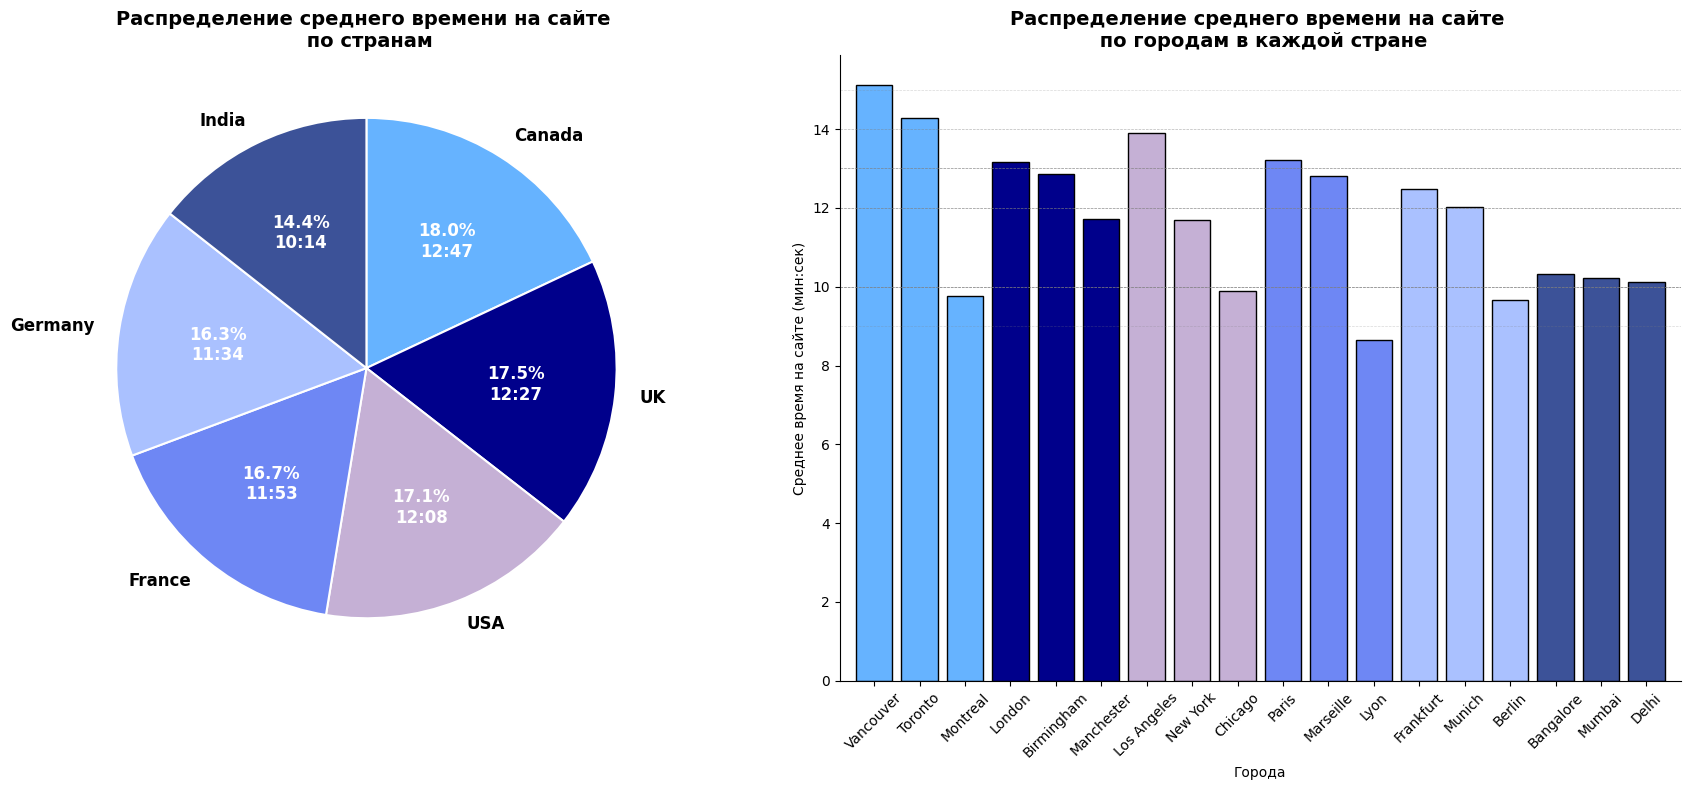

In [ ]:
# Шаг 1: Агрегируем данные по странам
top_countries_time = (
    df.groupby('country')
    .agg({'timeonsite': 'mean'})
    .sort_values('timeonsite', ascending=False)
    .head(10)
)

# Словарь для присвоения цветов странам
city_colors = {
    'UK': contrast_colors[1],       # Используем первый цвет для UK
    'India': contrast_colors[3],    # Используем второй цвет для India
    'France': contrast_colors[5],   # Используем третий цвет для France
    'Canada': contrast_colors[7],  # Используем четвертый цвет для Canada
    'Germany': contrast_colors[9], # Используем пятый цвет для Germany
    'USA': contrast_colors[17]      # Используем шестой цвет для USA
}

# Применяем цвета для стран из словаря city_colors
top_countries_time['color'] = top_countries_time.index.map(city_colors).fillna(contrast_colors[0])

# Шаг 2: Агрегируем данные по городам в каждой из топ-10 стран
# Фильтруем DataFrame по топ-10 странам
top_cities_time = (
    df[df['country'].isin(top_countries_time.index)]
    .groupby(['country', 'city'])
    .agg({'timeonsite': 'mean'})
    .sort_values('timeonsite', ascending=False)
)

# Функция для форматирования времени в 'ММ:СС'
def format_time(minutes_float):
    """Функция преобразует время в формате 'минуты.секунды' в 'ММ:СС'."""
    minutes = int(minutes_float)
    seconds = round((minutes_float - minutes) * 60)
    return f"{minutes}:{seconds:02}"

# Шаг 3: Построение диаграмм
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Данные для круговой диаграммы
labels = top_countries_time.index
sizes = top_countries_time['timeonsite']
colors = top_countries_time['color']
total_time = sizes.sum()

# Построение круговой диаграммы
wedges, texts, autotexts = axs[0].pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    autopct=lambda pct: f"{pct:.1f}%\n{format_time(pct * total_time / 100)}",
    textprops=dict(color='white', fontweight='bold', fontsize=12)
)

# Настройки текста для круговой диаграммы
for i, text in enumerate(texts):
    text.set_color('black')
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Заголовок круговой диаграммы
axs[0].set_title("Распределение среднего времени на сайте \n по странам", fontsize=14, fontweight='bold')

# Шаг 4: График топ городов по каждой стране
for country in top_countries_time.index:
    # Фильтруем данные по городам этой страны
    city_times = top_cities_time.loc[country]

    # Цвет для городов этой страны
    city_colors_for_country = city_colors.get(country, contrast_colors[0])

    # Построение столбчатой диаграммы
    bars = axs[1].bar(city_times.index.get_level_values('city'), city_times['timeonsite'],
                      color=city_colors_for_country, edgecolor='black')

    # Добавляем пунктирные линии
    for bar in bars:
        y_value = bar.get_height()
        rounded_y = round(y_value)
        axs[1].axhline(y=rounded_y, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

# Настройки для графика городов
axs[1].set_title("Распределение среднего времени на сайте \n по городам в каждой стране", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Города")
axs[1].set_ylabel("Среднее время на сайте (мин:сек)")
axs[1].tick_params(axis='x', rotation=45)
axs[1].margins(x=0.02)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Отображение графиков
plt.tight_layout()
plt.show()



**Среднее время на сайте**:
   - Лидирует **Канада** (12:47 мин), аутсайдер — **Индия** (10:14 мин).
   - Внутри стран заметны значительные колебания: максимальное время у пользователей в Ванкувере и Лос-Анджелесе (более 14 мин), минимальное — в Монреале и Лион (менее 10 мин).

**Рекомендация**:
Сфокусироваться на улучшении вовлеченности в городах с низким временем на сайте (например, Лион).

### 1.2. Среднее количество просмотренных страниц


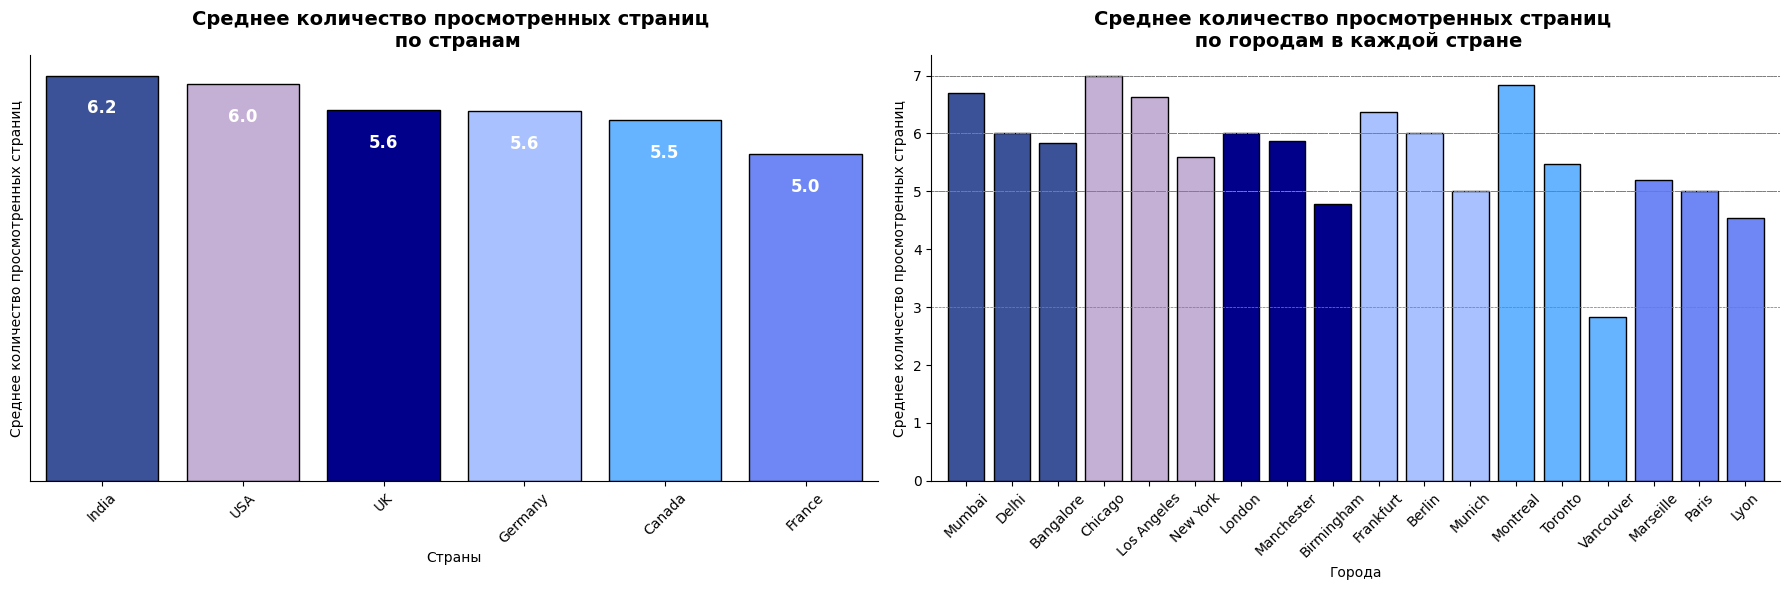

In [ ]:
# 1. Агрегируем данные по странам
top_countries_pages = df.groupby('country').agg({'pagesviewed': 'mean'}).sort_values('pagesviewed', ascending=False).head(10)

# Применяем цвета для стран из словаря city_colors
top_countries_pages['color'] = top_countries_pages.index.map(city_colors).fillna(contrast_colors[0])  # Если страна не указана, применяем первый цвет

# 2. Агрегируем данные по городам внутри каждой страны
top_cities_pages = df.groupby(['country', 'city']).agg({'pagesviewed': 'mean'}).sort_values('pagesviewed', ascending=False).groupby('country').head(10)

# Присваиваем цвет для городов в зависимости от страны
top_cities_pages['color'] = top_cities_pages.index.get_level_values(0).map(top_countries_pages['color'])

# Построение графиков на одной линии
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# График 1. Топ стран по среднему количеству просмотренных страниц
axs[0].bar(top_countries_pages.index, top_countries_pages['pagesviewed'], color=top_countries_pages['color'], edgecolor='black')
axs[0].set_title("Cреднее количество просмотренных страниц \n по странам", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Страны")
axs[0].set_ylabel("Среднее количество просмотренных страниц")
axs[0].tick_params(axis='x', rotation=45)  # Поворот подписей оси X
axs[0].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# Убираем верхнюю и правую рамку на графике стран
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Убираем метки на оси Y
axs[0].set_yticks([])

# Выводим значения внутри столбцов, чуть ниже
for i, pages in enumerate(top_countries_pages['pagesviewed']):
    axs[0].text(i, pages - 0.5, f"{pages:.1f}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# График 2. Топ городов по среднему количеству просмотренных страниц для каждой страны
for country in top_countries_pages.index:
    city_pages = top_cities_pages.loc[country]
    axs[1].bar(city_pages.index.get_level_values('city'), city_pages['pagesviewed'], color=city_pages['color'], edgecolor='black')

# Добавляем горизонтальные пунктирные линии на график по числовым значениям времени (бледные)
for country in top_countries_pages.index:
    city_pages = top_cities_pages.loc[country]
    for bar in axs[1].containers:
        for rect in bar:
            y_value = rect.get_height()  # Получаем значение столбца
            rounded_y = round(y_value)  # Округляем до ближайшего целого числа
            axs[1].axhline(y=rounded_y, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)  # Легкая пунктирная линия

# Заголовок и настройки для графика городов
axs[1].set_title("Среднее количество просмотренных страниц \n по городам в каждой стране", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Города")  # Подпись оси X
axs[1].set_ylabel("Среднее количество просмотренных страниц")  # Подпись оси Y
axs[1].tick_params(axis='x', rotation=45)  # Поворот меток на оси X
axs[1].margins(x=0.02)  # Добавление небольшого отступа по краям оси X

# Убираем верхнюю и правую рамки на графике городов
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Убираем легенду на графике городов
#axs[1].legend().set_visible(False)

# Отображение графиков
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()  # Отображение графиков


**Лидеры по количеству просмотренных страниц**:
   - На первом месте — **Индия** (6.2 страницы), за ней — **США** (6.0 страницы).
   - Худшие показатели у **Франции** (5.0 страницы).

**Разброс по городам**:
   - Самые высокие значения — в Мюнхене (7.0) и Чикаго (6.7).
   - Низкие значения — в Торонто (4.5), что может свидетельствовать о быстром уходе пользователей.

**Рекомендация**:
Уделить внимание улучшению контента для пользователей из Франции и городов с низким количеством просмотренных страниц, чтобы повысить вовлеченность.

### 1.3. Общее количество покупок

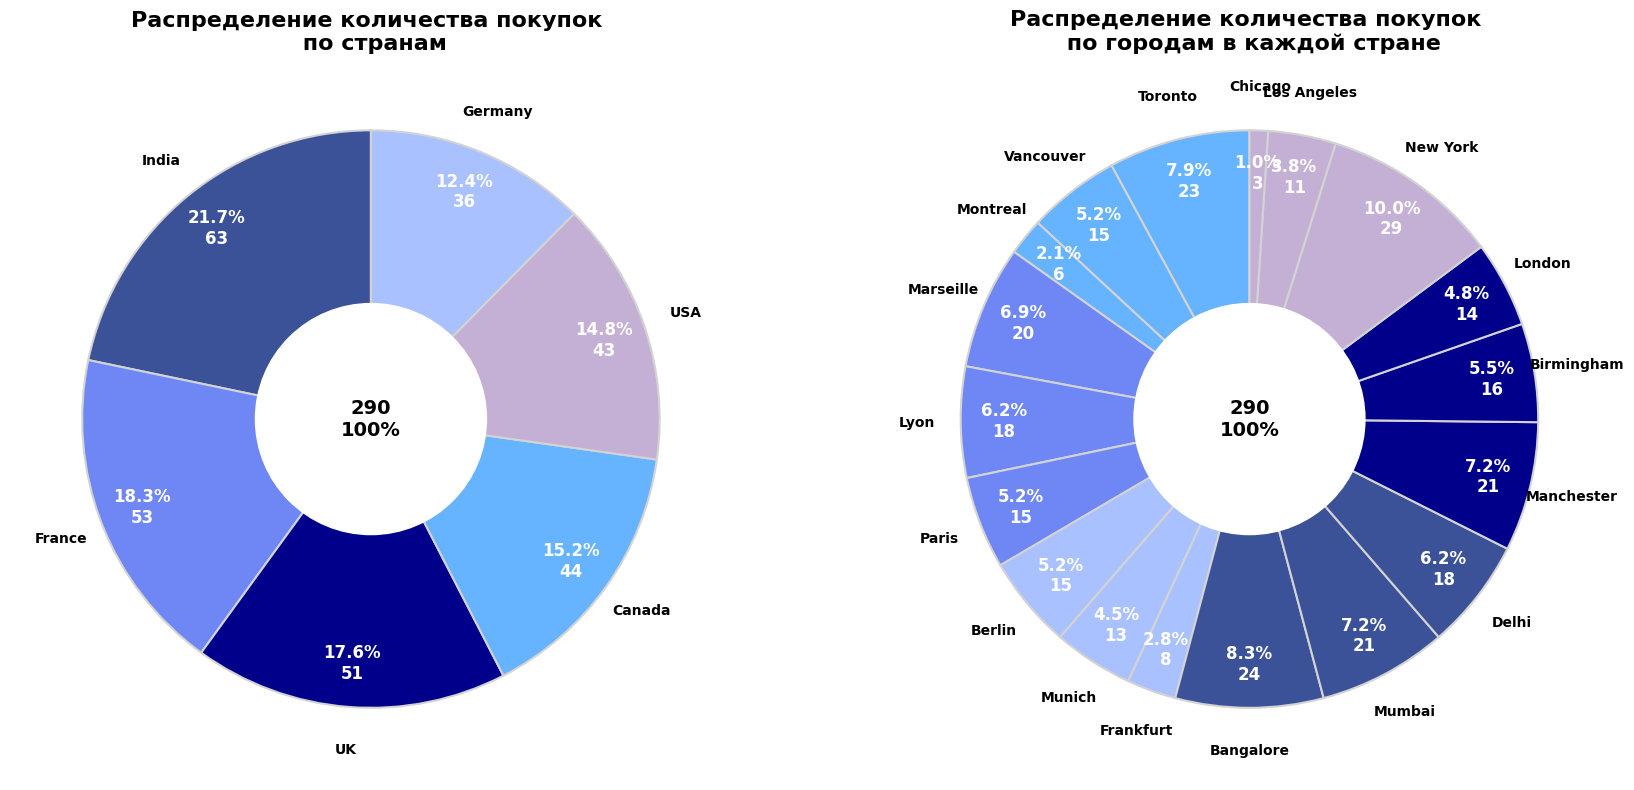

In [ ]:
# Шаг 1: Подготовка данных
# Агрегируем данные по странам и городам
top_countries = df.groupby('country').agg({'purchases': 'sum'}).sort_values(by='purchases', ascending=False)
top_cities = df.groupby(['country', 'city']).agg({'purchases': 'sum'}).sort_values(by=['country', 'purchases'], ascending=[True, False])

# Присваиваем цвета из словаря city_colors
top_countries['color'] = top_countries.index.map(city_colors.get)
top_countries['conversion'] = top_countries['purchases'] / top_countries['purchases'].sum() * 100

top_cities['color'] = top_cities.index.get_level_values(0).map(city_colors.get)
top_cities['conversion'] = top_cities['purchases'] / top_cities['purchases'].sum() * 100

# Функция для построения кольцевой диаграммы
def plot_donut(ax, data, title):
    wedges, texts = ax.pie(
        data['purchases'],
        labels=None,
        colors=data['color'],
        wedgeprops={'edgecolor': 'lightgray', 'linewidth': 1.5},
        startangle=90,
        radius=1.0
    )

    # Добавляем внутренний круг для эффекта кольцевой диаграммы
    center_circle = plt.Circle((0, 0), 0.4, color='white')
    ax.add_artist(center_circle)

    # Общая надпись в центре диаграммы
    total_purchases = data['purchases'].sum()
    ax.text(0, 0, f"{total_purchases}\n100%", ha='center', va='center', fontsize=14, fontweight='bold', color='black')

    # Располагаем подписи внутри сегментов
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.85 * np.cos(np.radians(angle))
        y = 0.85 * np.sin(np.radians(angle))

        # Подпись с процентом и количеством покупок
        percent = data['conversion'].iloc[i]
        purchases = data['purchases'].iloc[i]
        value_label = f"{percent:.1f}%\n{purchases}"
        ax.text(x, y, value_label, ha='center', va='center', fontsize=12, fontweight='bold', color='white')

        # Название города или страны
        if isinstance(data.index[i], tuple):
            name_label = data.index[i][1]  # Название города
        else:
            name_label = data.index[i]  # Название страны
            rotation = 0  # Без наклона для стран

        # Подпись с названием
        outer_x = 1.15 * np.cos(np.radians(angle))
        outer_y = 1.15 * np.sin(np.radians(angle))
        ax.text(outer_x, outer_y, name_label, ha='center', va='center', fontsize=10, fontweight='bold', color='black')

    # Заголовок диаграммы
    ax.set_title(title, fontsize=16, fontweight='bold')

# Создаем фигуру и оси
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# График 1: Кольцевая диаграмма для стран
plot_donut(axs[0], top_countries, "Распределение количества покупок \n по странам")

# График 2: Кольцевая диаграмма для городов
plot_donut(axs[1], top_cities, "Распределение количества покупок \n по городам в каждой стране")

# Отображение графиков
plt.tight_layout()
plt.show()


**Лидеры по покупкам :**

**Индия** — наиболее активный рынок для покупок, особенно популярны **Бангалор** и **Мумбаи**.
**США** и **Канада** также демонстрируют высокий уровень покупок, особенно в **Нью-Йорке** и **Торонто**.

**Аутсайдеры** :

Низкий уровень подключений отмечен в **Германии**, особенно во **Франкфурте** и в **Монреале**.

**Рекомендация** : Сфокусироваться на стимулировании покупок в городах с низкой активностью, за счет маркетинговых акций и улучшения пользовательского поведения.

### 1.4. Конверсия (отношение количества покупок к количеству добавлений в корзину)


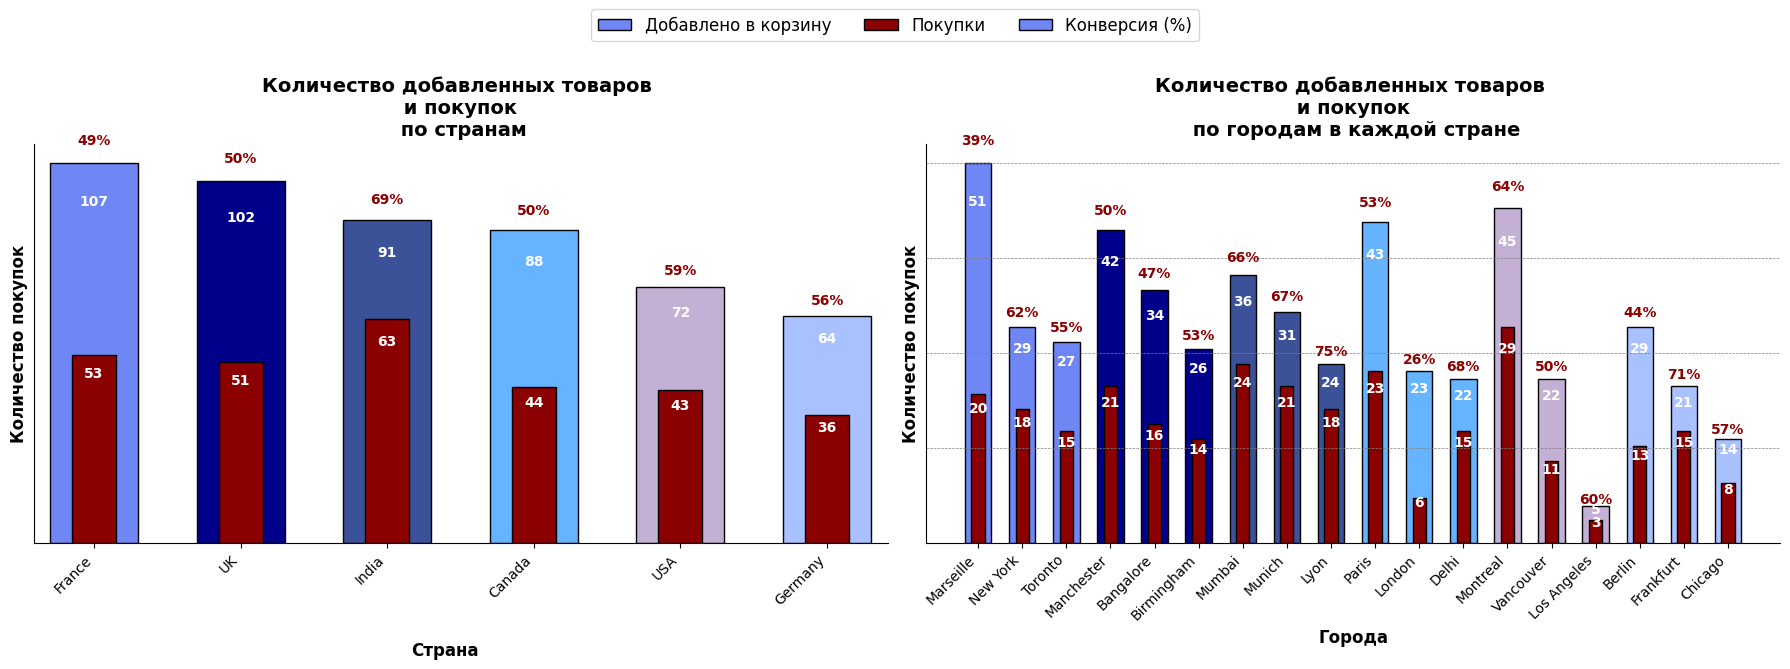

In [ ]:
# 1. Агрегируем данные по странам
country_data = df.groupby('country').agg({'purchases': 'sum', 'itemsincart': 'sum'})
country_data['conversion'] = (country_data['purchases'] / country_data['itemsincart']) * 100

# Сортировка по количеству добавлений в корзину и отбор топ-10 стран
top_countries = country_data.sort_values('itemsincart', ascending=False).head(10)

# Присваиваем цвета странам с использованием словаря city_colors
top_countries['color'] = top_countries.index.map(city_colors)

# Построение графиков на одной линии (2 столбца)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Функция для построения графика столбцов
def plot_bars(ax, data, title, grouped=False):
    bar_width = 0.6  # Ширина внешних столбцов
    inner_bar_width = 0.3  # Ширина внутренних столбцов
    indices = np.arange(len(data))  # Индексы для оси X

    # Внешний столбец — количество добавленных в корзину
    bars_outer = ax.bar(indices, data['itemsincart'], color=data['color'], edgecolor='black', width=bar_width, label='Добавлено в корзину')

    # Внутренний столбец — количество покупок
    bars_inner = ax.bar(indices, data['purchases'], color='darkred', edgecolor='black', width=inner_bar_width, label='Покупки')

    # Подписи внутри внешних столбцов (для количества товаров в корзине)
    for i, (items, purchases) in enumerate(zip(data['itemsincart'], data['purchases'])):
        ax.text(i, items - 0.1 * items, f"{int(items)}", ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, purchases - 0.1 * purchases, f"{int(purchases)}", ha='center', va='center', color='white', fontweight='bold')

    # Подписи конверсии сверху столбцов
    for i, conversion in enumerate(data['conversion']):
        ax.text(i, data['itemsincart'].iloc[i] + 0.05 * data['itemsincart'].iloc[i],
                f"{int(conversion)}%", ha='center', color='darkred', fontweight='bold')

    # Настройка оси X (показываем названия стран на оси)
    ax.set_xticks(indices)
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel("Количество покупок", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.margins(x=0.02)

    # Убираем верхнюю и правую рамки графика
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Убираем оси Y для графика стран, если мы не группируем
    if not grouped:
        ax.set_yticks([])

# График 1: Отображаем данные по странам
plot_bars(axs[0], top_countries, "Количество добавленных товаров \n и покупок \n по странам")

# Добавляем надпись "Страна" под первым графиком
fig.text(0.25, 0.01, 'Страна', ha='center', fontsize=12, fontweight='bold')

# 2. Анализ по городам с группировкой по странам
city_data = df.groupby(['country', 'city']).agg({'purchases': 'sum', 'itemsincart': 'sum'})
city_data['conversion'] = (city_data['purchases'] / city_data['itemsincart']) * 100

# Сортировка и отбор всех городов для каждой страны
top_cities = city_data.sort_values('itemsincart', ascending=False)

# Присваиваем цвет города на основе его страны
top_cities['color'] = top_cities.index.get_level_values(0).map(city_colors)

# График 2: Строим столбцы для городов
indices = np.arange(len(top_cities))  # Индексы для оси X
bar_width = 0.6  # Ширина внешних столбцов
inner_bar_width = 0.3  # Ширина внутренних столбцов

# Для каждой страны из топ-10
for i, country in enumerate(top_countries.index):
    city_data_for_country = top_cities[top_cities.index.get_level_values('country') == country]

    country_indices = np.arange(i * len(city_data_for_country), (i + 1) * len(city_data_for_country))

    # Внешний столбец — количество добавленных в корзину
    axs[1].bar(country_indices, city_data_for_country['itemsincart'], color=city_data_for_country['color'],
               edgecolor='black', width=bar_width)

    # Внутренний столбец — количество покупок
    axs[1].bar(country_indices, city_data_for_country['purchases'], color='darkred',
               edgecolor='black', width=inner_bar_width)

    # Подписи внутри внешних столбцов (для количества товаров в корзине)
    for j, (items, purchases) in enumerate(zip(city_data_for_country['itemsincart'], city_data_for_country['purchases'])):
        axs[1].text(country_indices[j], items - 0.1 * items, f"{int(items)}", ha='center', va='center', color='white', fontweight='bold')
        axs[1].text(country_indices[j], purchases - 0.1 * purchases, f"{int(purchases)}", ha='center', va='center', color='white', fontweight='bold')

    # Подписи конверсии сверху столбцов
    for j, conversion in enumerate(city_data_for_country['conversion']):
        axs[1].text(country_indices[j], city_data_for_country['itemsincart'].iloc[j] + 0.05 * city_data_for_country['itemsincart'].iloc[j],
                    f"{int(conversion)}%", ha='center', color='darkred', fontweight='bold')

# Добавляем подписи городов на оси X
axs[1].set_xticks(np.arange(len(top_cities)))  # Устанавливаем индексы для всех городов
axs[1].set_xticklabels(top_cities.index.get_level_values('city'), rotation=45, ha='right')  # Используем названия городов

# Настройки графика для городов
axs[1].set_title("Количество добавленных товаров \n и покупок \n по городам в каждой стране", fontsize=14, fontweight='bold')
axs[1].set_ylabel("Количество покупок", fontsize=12, fontweight='bold')
axs[1].set_xlabel("Города", fontsize=12, fontweight='bold')

# Убираем верхнюю и правую рамки на графике городов
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Убираем оси Y для графика городов
axs[1].set_yticks([])

# Убираем легенду для графика городов, так как она не требуется
# axs[1].legend(title="Страны", bbox_to_anchor=(1.05, 1), loc='upper left') # Убрано

# Добавление общей легенды сверху графиков
fig.legend(["Добавлено в корзину", "Покупки", "Конверсия (%)"],
           loc='upper center', fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.1))

# Добавление пунктирных линий на графике городов для значений
for y in np.linspace(0, top_cities['itemsincart'].max(), 5):
    axs[1].axhline(y=y, color='gray', linestyle='--', linewidth=0.5)

# Отображение графиков
plt.tight_layout()
plt.show()


**Лидеры по конверсии**:
   - **Германия** и **Индия** демонстрируют высокую конверсию (около 0.7), особенно в таких городах, как Берлин и Дели. Это свидетельствует об эффективной работе сайта и удобном процессе оформления заказа.

**Аутсайдеры**:
   - Низкая конверсия у **Канады** и **Франции**, особенно в Монреале и Марселе, несмотря на высокое количество добавлений в корзину. Это может указывать на проблемы с пользовательским опытом на этапе оформления покупки.

**Рекомендация**:
Для повышения конверсии в аутсайдерских городах следует оптимизировать процесс оформления заказа и улучшить интерфейс корзины, чтобы уменьшить количество брошенных покупок.

## 2 . Сигментация **по типу устройства** (настольный компьютер, ноутбук, смартфон, планшет)

In [ ]:
# Рассчитаем метрики по типу устройства
devicetype_metrics = df.groupby(['devicetype']).agg(
    mean_timeonsite=('timeonsite', 'mean'),
    mean_pagesviewed=('pagesviewed', 'mean'),
    total_purchases=('purchases', 'sum'),
    total_itemsincart=('itemsincart', 'sum')
)

# Конверсия = кол-во покупок / кол-во товаров в корзине
devicetype_metrics['conversion_rate'] = devicetype_metrics['total_purchases'] / devicetype_metrics['total_itemsincart']

# Округляем средние значения до 2 знаков после запятой
devicetype_metrics['mean_timeonsite'] = devicetype_metrics['mean_timeonsite'].round(2)
devicetype_metrics['mean_pagesviewed'] = devicetype_metrics['mean_pagesviewed'].round(2)
devicetype_metrics['conversion_rate'] = devicetype_metrics['conversion_rate'].round(2)

# Выводим результат по городам
print("Метрики по типу устройств:\n")
display(devicetype_metrics)


Метрики по типу устройств:



,mean_timeonsite,mean_pagesviewed,total_purchases,total_itemsincart,conversion_rate
devicetype,,,,,
Desktop,12.06,5.87,39,94,0.41
Laptop,12.60,5.35,102,158,0.65
Smartphone,11.12,5.96,87,143,0.61
Tablet,11.67,5.24,62,129,0.48


### 2.1. Среднее время на сайте по типу устройства

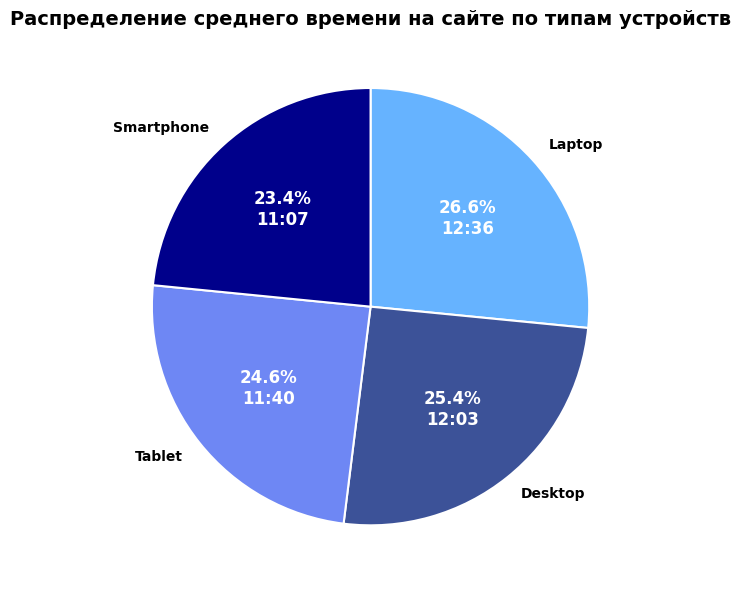

In [ ]:
# Шаг 1: Агрегируем данные по типу устройства
top_devicetype_time = (
    df.groupby('devicetype')
    .agg({'timeonsite': 'mean'})
    .sort_values('timeonsite', ascending=False)
    .head(10)
)

# Шаг 2: Присваиваем цвета для каждого типа устройства из палитры contrast_colors.
# Укажем индекс цвета вручную для каждого типа устройства.
device_colors = {
    'Smartphone': contrast_colors[1],  # Смартфон (темно-синий)
    'Desktop': contrast_colors[3],     # Настольный компьютер (глубокий синий)
    'Tablet': contrast_colors[5],      # Планшет (светло-синий)
    'Laptop': contrast_colors[7],      # Ноутбук (яркий синий)
}

# Применяем цвета для типов устройств из словаря device_colors
top_devicetype_time['color'] = top_devicetype_time.index.map(device_colors).fillna(contrast_colors[0])

# Функция для форматирования времени в 'ММ:СС'
def format_time(minutes_float):
    """Функция преобразует время в формате 'минуты.секунды' в 'ММ:СС'."""
    minutes = int(minutes_float)
    seconds = round((minutes_float - minutes) * 60)
    return f"{minutes}:{seconds:02}"

# Шаг 2: Построение графика (только круговая диаграмма)
fig, ax = plt.subplots(figsize=(10, 6))

# Данные для круговой диаграммы
labels = top_devicetype_time.index
sizes = top_devicetype_time['timeonsite']
colors = top_devicetype_time['color']
total_time = sizes.sum()

# Построение круговой диаграммы для типов устройств
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    autopct=lambda pct: f"{pct:.1f}%\n{format_time(pct * total_time / 100)}",
    textprops=dict(color='white', fontweight='bold', fontsize=12)
)

# Настройки текста для круговой диаграммы
for i, text in enumerate(texts):
    text.set_color('black')
    text.set_fontsize(10)

# Заголовок круговой диаграммы
ax.set_title("Распределение среднего времени на сайте по типам устройств", fontsize=14, fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


- **Лидирует** категория **Laptop** (12.60 мин), за ней следует **Desktop** (12.06 мин), что свидетельствует о высокой вовлеченности пользователей этих устройств.
- **Smartphone** и **Tablet** показывают меньшее время на сайте (11.12 мин и 11.67 мин соответственно), что может указывать на более целенаправленные визиты или ограничения по удобству пользования.

**Рекомендация**:
Оптимизировать мобильную версию сайта, чтобы увеличить вовлеченность пользователей смартфонов и планшетов.

### 2.2. Среднее количество просмотренных страниц


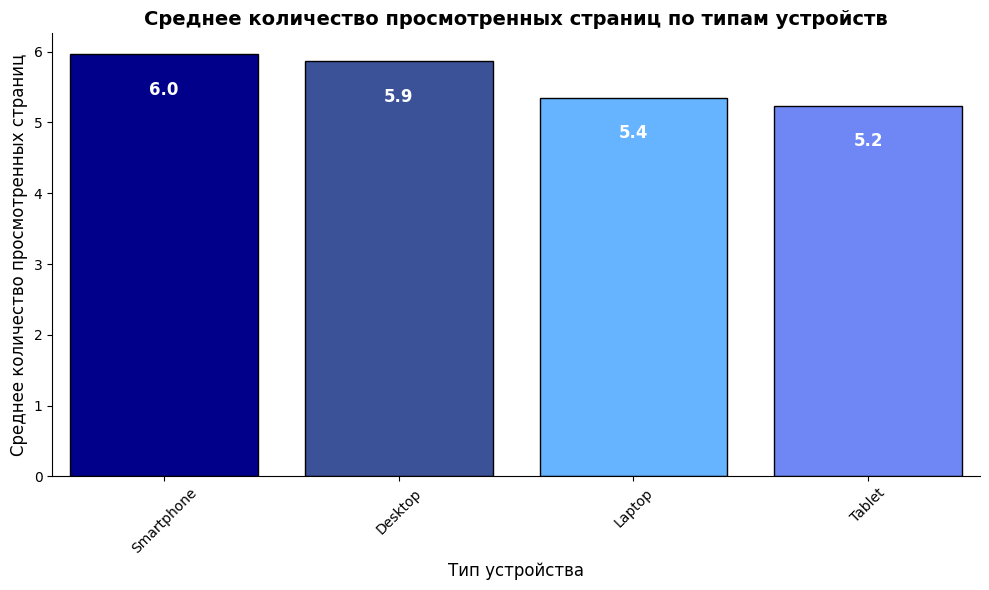

In [ ]:
# Шаг 1: Агрегируем данные по типу устройства, вычисляя среднее количество просмотренных страниц
device_pages = df.groupby('devicetype').agg({'pagesviewed': 'mean'}).sort_values('pagesviewed', ascending=False)


# Шаг 2: Добавляем столбец 'color' в DataFrame device_pages, чтобы присвоить цвета по типам устройств
device_pages['color'] = device_pages.index.map(lambda x: device_colors.get(x, contrast_colors[0]))  # Если тип устройства не указан, применяем первый цвет

# Шаг 3: Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# График: столбчатая диаграмма по типам устройств
bars = ax.bar(device_pages.index, device_pages['pagesviewed'], color=device_pages['color'], edgecolor='black')

# Настройки графика
ax.set_title("Среднее количество просмотренных страниц по типам устройств", fontsize=14, fontweight='bold')
ax.set_xlabel("Тип устройства", fontsize=12)
ax.set_ylabel("Среднее количество просмотренных страниц", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.margins(x=0.02)

# Убираем верхнюю и правую рамки
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем подписи с количеством просмотренных страниц внутри столбцов
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 0.5, f"{height:.1f}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


- **Лидеры** — **Smartphone** и **Desktop** (5.96 и 5.87 страниц соответственно), что может говорить о хорошем пользовательском опыте на этих устройствах.
- **Худшие показатели** — у **Tablet** и **Laptop** (5.24 и 5.35 страниц), что может свидетельствовать о менее удобной навигации или специфике поведения пользователей этих устройств.

**Рекомендация**:
Обратить внимание на улучшение навигации и интерфейса для пользователей планшетов и ноутбуков, чтобы повысить глубину просмотра страниц.

### 2.3. Общее количество покупок

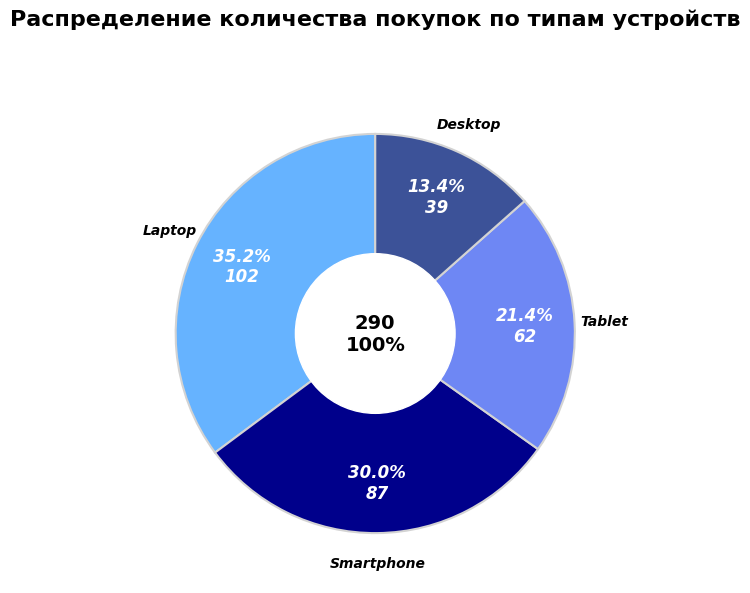

In [ ]:
# Функция для построения кольцевой диаграммы
def plot_donut(ax, data, title):
    # Считаем общий объем покупок
    total_purchases = data['purchases'].sum()

    # Построение кольцевой диаграммы
    wedges, texts = ax.pie(
        data['purchases'],
        labels=None,
        colors=data['color'],
        wedgeprops={'edgecolor': 'lightgray', 'linewidth': 1.5},
        startangle=90,
        radius=1.0
    )

    # Добавляем внутренний круг для эффекта кольцевой диаграммы
    center_circle = plt.Circle((0, 0), 0.4, color='white')
    ax.add_artist(center_circle)

    # Общая надпись в центре диаграммы
    ax.text(0, 0, f"{total_purchases}\n100%", ha='center', va='center', fontsize=14, fontweight='bold', color='black')

    # Располагаем подписи внутри сегментов
    for i, wedge in enumerate(wedges):
        # Рассчитываем угол для каждой секции
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.75 * wedge.r * np.cos(np.radians(angle))
        y = 0.75 * wedge.r * np.sin(np.radians(angle))

        # Рассчитываем процент покупок для текущего типа устройства
        purchases = data['purchases'].iloc[i]
        percent = (purchases / total_purchases) * 100

        # Подпись с процентом и количеством покупок
        value_label = f"{percent:.1f}%\n{purchases}"
        ax.text(x, y, value_label, ha='center', va='center', fontsize=12, fontweight='bold', color='white', style='italic')

        # Название типа устройства
        name_label = data.index[i]  # Название типа устройства
        rotation = 0  # Без наклона для типов устройств

        # Подпись с названием типа устройства
        outer_x = 1.15 * wedge.r * np.cos(np.radians(angle))
        outer_y = 1.15 * wedge.r * np.sin(np.radians(angle))
        ax.text(outer_x, outer_y, name_label, ha='center', va='center', fontsize=10, fontweight='bold', color='black', style='italic', rotation=rotation)

    # Заголовок диаграммы
    ax.set_title(title, fontsize=16, fontweight='bold', y=1.1)

# Шаг 1: Агрегируем данные по типам устройств и сортируем по количеству покупок
top_devicetype = df.groupby('devicetype').agg({'purchases': 'sum'})  # Агрегируем только по покупкам
top_devicetype = top_devicetype.sort_values(by='purchases', ascending=False)

# Применяем цвета для типов устройств из словаря device_colors
top_devicetype['color'] = top_devicetype.index.map(device_colors).fillna(contrast_colors[0])

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# График: Кольцевая диаграмма для типов устройств
plot_donut(ax, top_devicetype, "Распределение количества покупок по типам устройств")

# Отображение графика
plt.tight_layout()
plt.show()


- **Лидирует** категория **Laptop** с 102 покупками, что может быть связано с удобством оформления заказа и доверием к этому типу устройства для совершения покупок.
- **Smartphone** также показывает высокий уровень покупок (87), указывая на растущую популярность мобильных покупок.
- **Tablet** и **Desktop** имеют наименьшие показатели (62 и 39 покупок), что может свидетельствовать о снижении интереса пользователей к совершению покупок на этих устройствах.

**Рекомендация**:
Для увеличения покупок с планшетов и настольных компьютеров стоит провести анализ барьеров, мешающих завершению покупки, и оптимизировать процесс оформления заказа.

### 2.4. Конверсия (отношение количества покупок к количеству добавлений в корзину)


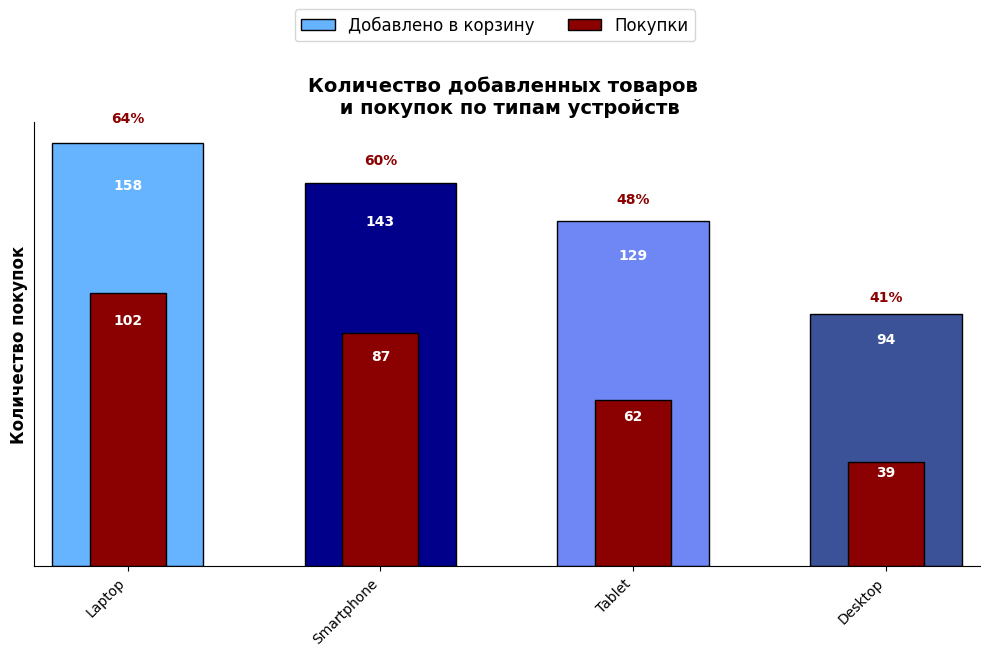

In [ ]:
# Агрегируем данные по типам устройств
device_data = df.groupby('devicetype').agg({'purchases': 'sum', 'itemsincart': 'sum'})
device_data['conversion'] = (device_data['purchases'] / device_data['itemsincart']) * 100

# Сортируем по количеству товаров в корзине и отбираем топ-10 типов устройств
top_devices = device_data.sort_values('itemsincart', ascending=False).head(10)

# Присваиваем цвета для типов устройств из словаря device_colors
top_devices['color'] = top_devices.index.map(device_colors)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# Функция для построения столбчатого графика
def plot_bars(ax, data, title):
    bar_width = 0.6  # Ширина внешних столбцов
    inner_bar_width = 0.3  # Ширина внутренних столбцов
    indices = np.arange(len(data))  # Индексы для оси X

    # Внешний столбец — количество добавленных в корзину
    bars_outer = ax.bar(indices, data['itemsincart'], color=data['color'], edgecolor='black', width=bar_width, label='Добавлено в корзину')

    # Внутренний столбец — количество покупок
    bars_inner = ax.bar(indices, data['purchases'], color='darkred', edgecolor='black', width=inner_bar_width, label='Покупки')

    # Подписи внутри внешних столбцов (для количества товаров в корзине)
    for i, (items, purchases) in enumerate(zip(data['itemsincart'], data['purchases'])):
        ax.text(i, items - 0.1 * items, f"{int(items)}", ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, purchases - 0.1 * purchases, f"{int(purchases)}", ha='center', va='center', color='white', fontweight='bold')

    # Подписи конверсии сверху столбцов
    for i, conversion in enumerate(data['conversion']):
        ax.text(i, data['itemsincart'].iloc[i] + 0.05 * data['itemsincart'].iloc[i],
                f"{int(conversion)}%", ha='center', color='darkred', fontweight='bold')

    # Настройка оси X (показываем названия типов устройств на оси)
    ax.set_xticks(indices)
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel("Количество покупок", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.margins(x=0.02)

    # Убираем верхнюю и правую рамки графика
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Убираем оси Y
    ax.set_yticks([])

# Построение графика для типов устройств
plot_bars(ax, top_devices, "Количество добавленных товаров \n и покупок по типам устройств")

# Добавление общей легенды сверху графиков
fig.legend(["Добавлено в корзину", "Покупки", "Конверсия (%)"],
           loc='upper center', fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.1))

# Отображение графика
plt.tight_layout()
plt.show()


- **Высокая конверсия** наблюдается у пользователей **Laptop** (0.65) и **Smartphone** (0.61), что указывает на удобство оформления заказов и высокую готовность совершать покупки с этих устройств.
- **Низкая конверсия** отмечена у **Desktop** (0.41) и **Tablet** (0.48), что может свидетельствовать о сложностях в процессе завершения покупки или низкой мотивации пользователей на этих устройствах.

**Рекомендация**:
Улучшить интерфейс и пользовательский опыт для пользователей настольных компьютеров и планшетов, чтобы повысить конверсию и снизить количество брошенных корзин.

## 3 . Сигментация по операционной системе (Windows, macOS, iOS, Android)

In [ ]:
# Рассчитаем метрики по виду операционной системы
os_metrics = df.groupby(['os']).agg(
    mean_timeonsite=('timeonsite', 'mean'),
    mean_pagesviewed=('pagesviewed', 'mean'),
    total_purchases=('purchases', 'sum'),
    total_itemsincart=('itemsincart', 'sum')
)

# Конверсия = кол-во покупок / кол-во товаров в корзине
os_metrics['conversion_rate'] = os_metrics['total_purchases'] / os_metrics['total_itemsincart']

# Округляем средние значения до 2 знаков после запятой
os_metrics['mean_timeonsite'] = os_metrics['mean_timeonsite'].round(2)
os_metrics['mean_pagesviewed'] = os_metrics['mean_pagesviewed'].round(2)
os_metrics['conversion_rate'] = os_metrics['conversion_rate'].round(2)

# Выводим результат по городам
print("Метрики по операционной системе:\n")
display(os_metrics)

Метрики по операционной системе:



,mean_timeonsite,mean_pagesviewed,total_purchases,total_itemsincart,conversion_rate
os,,,,,
Android,12.52,5.24,79,176,0.45
Windows,11.95,5.89,83,122,0.68
iOS,12.27,5.81,64,128,0.50
macOS,10.16,5.44,64,98,0.65


### 3.1. Среднее время на сайте по типу устройства

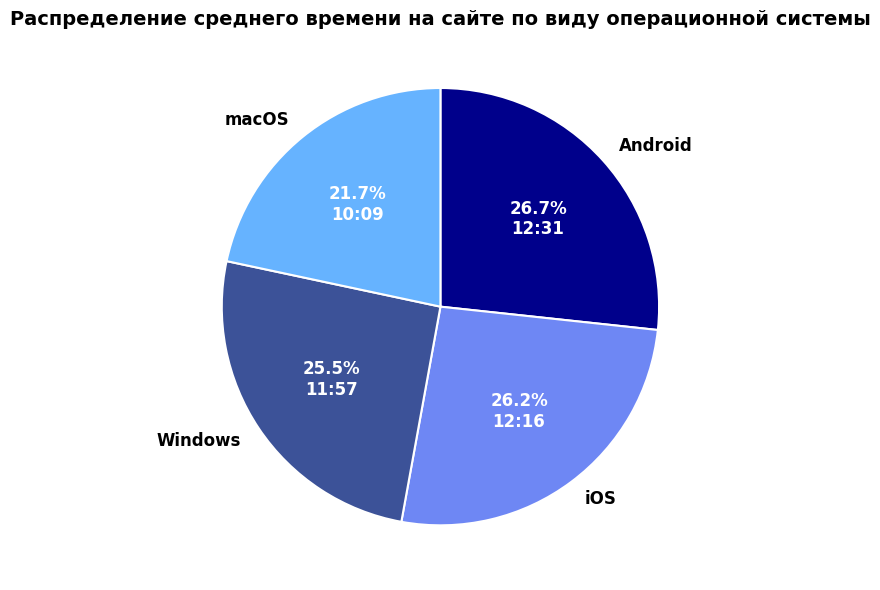

In [ ]:
# Шаг 1: Агрегируем данные по виду операционной системы
top_os_time = (
    df.groupby('os')
    .agg({'timeonsite': 'mean'})
    .sort_values('timeonsite', ascending=False)
    .head(10)
)

# Шаг 2: Присваиваем цвета для каждого типа устройства из палитры contrast_colors.
# Укажем индекс цвета вручную для каждого по виду операционной системы.
os_colors = {
    'Android': contrast_colors[1],
    'Windows': contrast_colors[3],
    'iOS': contrast_colors[5],
    'macOS': contrast_colors[7],
}

# Применяем цвета по виду операционной системы из словаря device_colors
top_os_time['color'] = top_os_time.index.map(os_colors).fillna(contrast_colors[0])

# Функция для форматирования времени в 'ММ:СС'
def format_time(minutes_float):
    """Функция преобразует время в формате 'минуты.секунды' в 'ММ:СС'."""
    minutes = int(minutes_float)
    seconds = round((minutes_float - minutes) * 60)
    return f"{minutes}:{seconds:02}"

# Шаг 2: Построение графика (только круговая диаграмма)
fig, ax = plt.subplots(figsize=(10, 6))

# Данные для круговой диаграммы
labels = top_os_time.index
sizes = top_os_time['timeonsite']
colors = top_os_time['color']
total_time = sizes.sum()

# Построение круговой диаграммы по виду операционной системы
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    autopct=lambda pct: f"{pct:.1f}%\n{format_time(pct * total_time / 100)}",
    textprops=dict(color='white', fontweight='bold', fontsize=12)
)

# Настройки текста для круговой диаграммы
for i, text in enumerate(texts):
    text.set_color('black')
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Заголовок круговой диаграммы
ax.set_title("Распределение среднего времени на сайте по виду операционной системы", fontsize=14, fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


**Среднее время, проведенное на сайте:**

- **Android** — 12.31 мин
- **Windows** — 11.57 мин
- **iOS** — 12.16 мин
- **macOS** — 10.09 мин

**Вывод**: Пользователи на платформе Android проводят на сайте в среднем больше времени (12.31 мин), чем на других операционных системах. Наименьшее среднее время наблюдается у пользователей macOS (10.09 мин).

### 3.2. Среднее количество просмотренных страниц


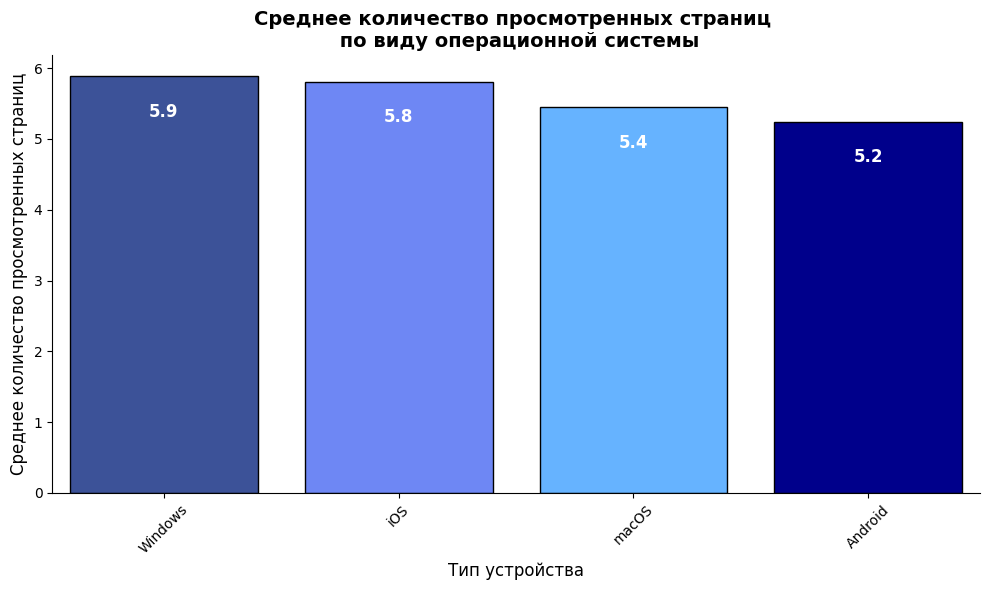

In [ ]:
# Шаг 1: Агрегируем данные по виду операционной системы, вычисляя среднее количество просмотренных страниц
os_pages = df.groupby('os').agg({'pagesviewed': 'mean'}).sort_values('pagesviewed', ascending=False)

# Шаг 3: Добавляем столбец 'color' в DataFrame device_pages, чтобы присвоить цвета по виду операционной системы
os_pages['color'] = os_pages.index.map(lambda x: os_colors.get(x, contrast_colors[0]))  # Если операционная система не указана, применяем первый цвет

# Шаг 4: Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# График: столбчатая диаграмма по виду операционной системы
bars = ax.bar(os_pages.index, os_pages['pagesviewed'], color=os_pages['color'], edgecolor='black')

# Настройки графика
ax.set_title("Среднее количество просмотренных страниц \n по виду операционной системы", fontsize=14, fontweight='bold')
ax.set_xlabel("Тип устройства", fontsize=12)
ax.set_ylabel("Среднее количество просмотренных страниц", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.margins(x=0.02)

# Убираем верхнюю и правую рамки
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем подписи с количеством просмотренных страниц внутри столбцов
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 0.5, f"{height:.1f}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


**Среднее количество просмотренных страниц:**

- **Android** — 5.24 страниц
- **Windows** — 5.89 страниц
- **iOS** — 5.81 страниц
- **macOS** — 5.44 страниц

**Вывод**: Пользователи Windows и iOS в среднем просматривают больше страниц (5.89 и 5.81 соответственно), чем пользователи Android и macOS.

### 3.3. Общее количество покупок

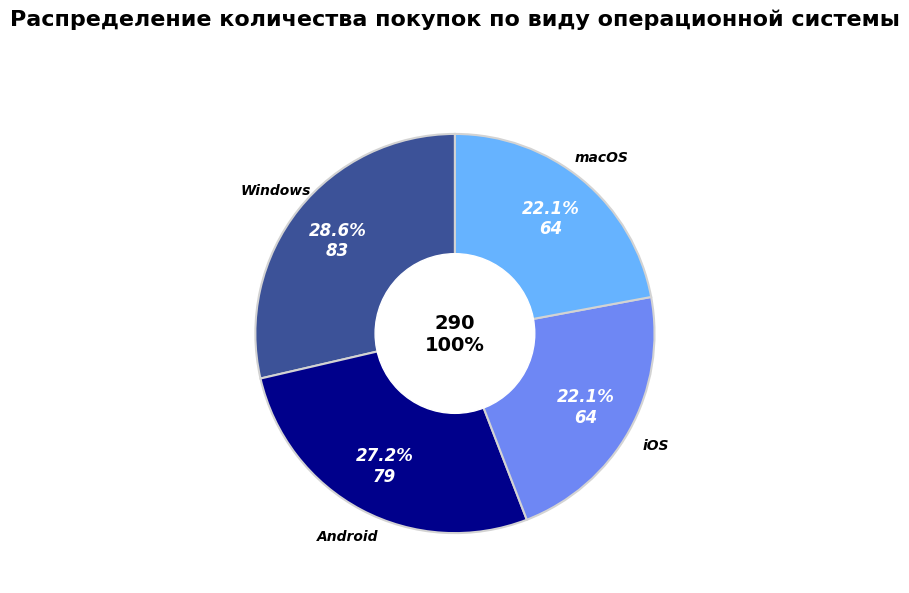

In [ ]:
# Функция для построения кольцевой диаграммы
def plot_donut(ax, data, title):
    # Считаем общий объем покупок
    total_purchases = data['purchases'].sum()

    # Построение кольцевой диаграммы
    wedges, texts = ax.pie(
        data['purchases'],
        labels=None,
        colors=data['color'],
        wedgeprops={'edgecolor': 'lightgray', 'linewidth': 1.5},
        startangle=90,
        radius=1.0
    )

    # Добавляем внутренний круг для эффекта кольцевой диаграммы
    center_circle = plt.Circle((0, 0), 0.4, color='white')
    ax.add_artist(center_circle)

    # Общая надпись в центре диаграммы
    ax.text(0, 0, f"{total_purchases}\n100%", ha='center', va='center', fontsize=14, fontweight='bold', color='black')

    # Располагаем подписи внутри сегментов
    for i, wedge in enumerate(wedges):
        # Рассчитываем угол для каждой секции
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.75 * wedge.r * np.cos(np.radians(angle))
        y = 0.75 * wedge.r * np.sin(np.radians(angle))

        # Рассчитываем процент покупок для текущего типа устройства
        purchases = data['purchases'].iloc[i]
        percent = (purchases / total_purchases) * 100

        # Подпись с процентом и количеством покупок
        value_label = f"{percent:.1f}%\n{purchases}"
        ax.text(x, y, value_label, ha='center', va='center', fontsize=12, fontweight='bold', color='white', style='italic')

        # Название типа устройства
        name_label = data.index[i]  # Название типа устройства
        rotation = 0  # Без наклона для типов устройств

        # Подпись с названием типа устройства
        outer_x = 1.15 * wedge.r * np.cos(np.radians(angle))
        outer_y = 1.15 * wedge.r * np.sin(np.radians(angle))
        ax.text(outer_x, outer_y, name_label, ha='center', va='center', fontsize=10, fontweight='bold', color='black', style='italic', rotation=rotation)

    # Заголовок диаграммы
    ax.set_title(title, fontsize=16, fontweight='bold', y=1.1)

# Шаг 1: Агрегируем данные по типам устройств и сортируем по количеству покупок
top_os = df.groupby('os').agg({'purchases': 'sum'})  # Агрегируем только по покупкам
top_os = top_os.sort_values(by='purchases', ascending=False)

# Применяем цвета для типов устройств из словаря device_colors
top_os['color'] = top_os.index.map(os_colors).fillna(contrast_colors[0])

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# График: Кольцевая диаграмма для типов устройств
plot_donut(ax, top_os, "Распределение количества покупок по виду операционной системы")

# Отображение графика
plt.tight_layout()
plt.show()


**Общее количество покупок:**

- **Android** — 79 покупок
- **Windows** — 83 покупок
- **iOS** — 64 покупок
- **macOS** — 64 покупок

**Вывод**: Наибольшее количество покупок совершили пользователи Windows (83 покупок), за ними следуют пользователи Android (79 покупок). Пользователи iOS и macOS совершают меньше покупок (по 64 каждое).

### 3.4. Конверсия (отношение количества покупок к количеству добавлений в корзину)


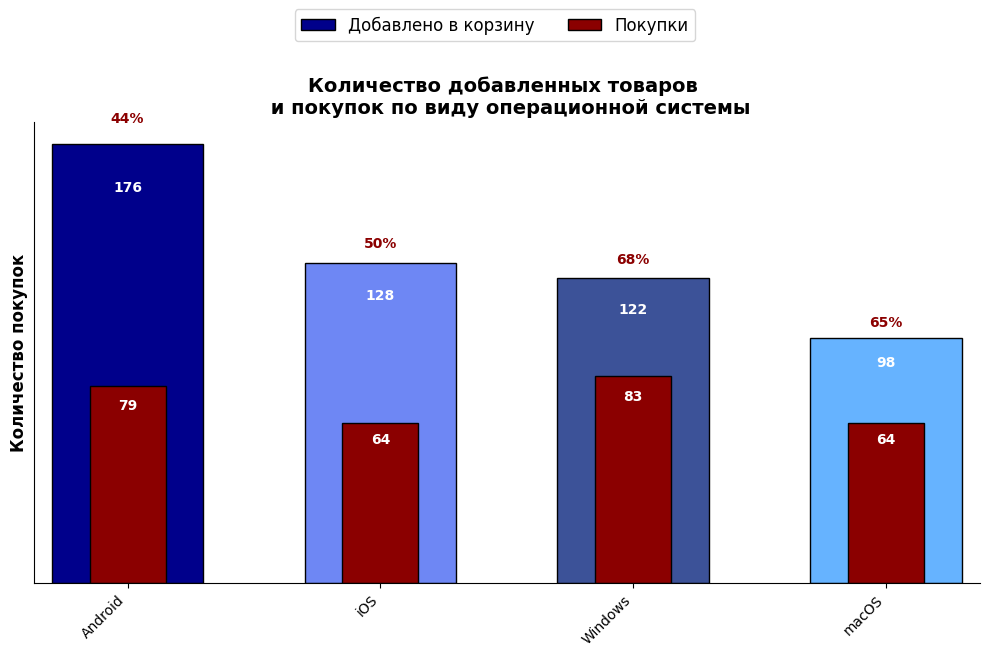

In [ ]:
# Агрегируем данные по типам устройств
os_data = df.groupby('os').agg({'purchases': 'sum', 'itemsincart': 'sum'})
os_data['conversion'] = (os_data['purchases'] / os_data['itemsincart']) * 100

# Сортируем по количеству товаров в корзине и отбираем топ-10 типов устройств
top_os = os_data.sort_values('itemsincart', ascending=False).head(10)

# Присваиваем цвета для типов устройств из словаря device_colors
top_os['color'] = top_os.index.map(os_colors)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# Функция для построения столбчатого графика
def plot_bars(ax, data, title):
    bar_width = 0.6  # Ширина внешних столбцов
    inner_bar_width = 0.3  # Ширина внутренних столбцов
    indices = np.arange(len(data))  # Индексы для оси X

    # Внешний столбец — количество добавленных в корзину
    bars_outer = ax.bar(indices, data['itemsincart'], color=data['color'], edgecolor='black', width=bar_width, label='Добавлено в корзину')

    # Внутренний столбец — количество покупок
    bars_inner = ax.bar(indices, data['purchases'], color='darkred', edgecolor='black', width=inner_bar_width, label='Покупки')

    # Подписи внутри внешних столбцов (для количества товаров в корзине)
    for i, (items, purchases) in enumerate(zip(data['itemsincart'], data['purchases'])):
        ax.text(i, items - 0.1 * items, f"{int(items)}", ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, purchases - 0.1 * purchases, f"{int(purchases)}", ha='center', va='center', color='white', fontweight='bold')

    # Подписи конверсии сверху столбцов
    for i, conversion in enumerate(data['conversion']):
        ax.text(i, data['itemsincart'].iloc[i] + 0.05 * data['itemsincart'].iloc[i],
                f"{int(conversion)}%", ha='center', color='darkred', fontweight='bold')

    # Настройка оси X (показываем названия типов устройств на оси)
    ax.set_xticks(indices)
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel("Количество покупок", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.margins(x=0.02)

    # Убираем верхнюю и правую рамки графика
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Убираем оси Y
    ax.set_yticks([])

# Построение графика для типов устройств
plot_bars(ax, top_os, "Количество добавленных товаров \n и покупок по виду операционной системы")

# Добавление общей легенды сверху графиков
fig.legend(["Добавлено в корзину", "Покупки", "Конверсия (%)"],
           loc='upper center', fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.1))

# Отображение графика
plt.tight_layout()
plt.show()


**Конверсия (отношение покупок к добавлениям в корзину):**

- **Android** — 0.45
- **Windows** — 0.68
- **iOS** — 0.50
- **macOS** — 0.65

**Вывод**: Пользователи Windows имеют наибольшую конверсию (0.68), что указывает на более эффективное завершение покупок. Наименьшую конверсию демонстрируют пользователи Android (0.45).

## 4 . Источники трафика (поисковые системы, социальные сети, прямые переходы, рефералы)

In [ ]:
# Рассчитаем метрики по источнику трафика
trafficsource_metrics = df.groupby(['trafficsource']).agg(
    mean_timeonsite=('timeonsite', 'mean'),
    mean_pagesviewed=('pagesviewed', 'mean'),
    total_purchases=('purchases', 'sum'),
    total_itemsincart=('itemsincart', 'sum')
)

# Конверсия = кол-во покупок / кол-во товаров в корзине
trafficsource_metrics['conversion_rate'] = trafficsource_metrics['total_purchases'] / trafficsource_metrics['total_itemsincart']

# Округляем средние значения до 2 знаков после запятой
trafficsource_metrics['mean_timeonsite'] = trafficsource_metrics['mean_timeonsite'].round(2)
trafficsource_metrics['mean_pagesviewed'] = trafficsource_metrics['mean_pagesviewed'].round(2)
trafficsource_metrics['conversion_rate'] = trafficsource_metrics['conversion_rate'].round(2)

# Выводим результат по городам
print("Метрики по источнику трафика:\n")
display(trafficsource_metrics)

Метрики по источнику трафика:



,mean_timeonsite,mean_pagesviewed,total_purchases,total_itemsincart,conversion_rate
trafficsource,,,,,
Direct,11.11,6.02,79,140,0.56
Referrals,12.28,5.42,61,130,0.47
Search Engines,11.97,5.00,88,139,0.63
Social Networks,12.56,5.88,62,115,0.54


### 4.1. Среднее время на сайте по источнику трафика

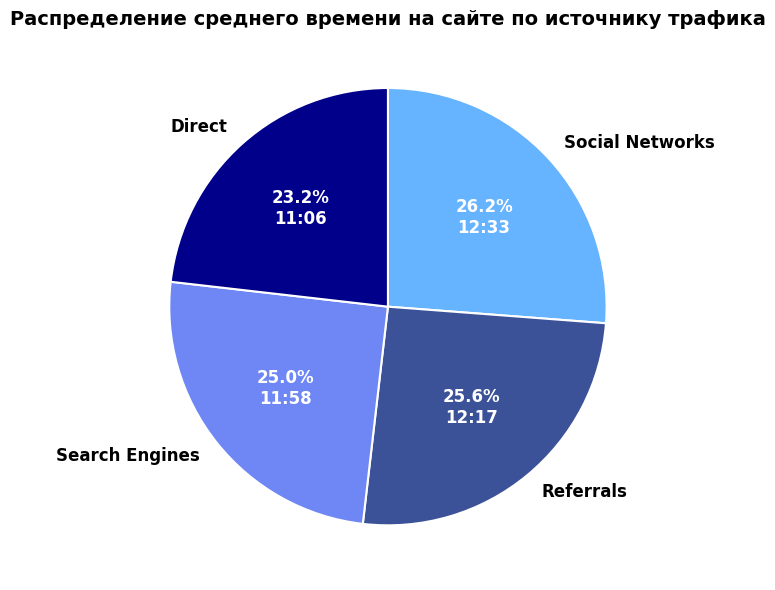

In [ ]:
# Шаг 1: Агрегируем данные по источнику трафика
top_trafficsource_time = (
    df.groupby('trafficsource')
    .agg({'timeonsite': 'mean'})
    .sort_values('timeonsite', ascending=False)
    .head(10)
)

# Шаг 2: Присваиваем цвета для каждого источника трафика из палитры contrast_colors.
# Укажем индекс цвета вручную для каждого по виду операционной системы.
trafficsource_colors = {
    'Direct': contrast_colors[1],
    'Referrals': contrast_colors[3],
    'Search Engines': contrast_colors[5],
    'Social Networks': contrast_colors[7],
}

# Применяем цвета по источнику трафика из словаря trafficsource_colors
top_trafficsource_time['color'] = top_trafficsource_time.index.map(trafficsource_colors).fillna(contrast_colors[0])

# Функция для форматирования времени в 'ММ:СС'
def format_time(minutes_float):
    """Функция преобразует время в формате 'минуты.секунды' в 'ММ:СС'."""
    minutes = int(minutes_float)
    seconds = round((minutes_float - minutes) * 60)
    return f"{minutes}:{seconds:02}"

# Шаг 2: Построение графика (только круговая диаграмма)
fig, ax = plt.subplots(figsize=(10, 6))

# Данные для круговой диаграммы
labels = top_trafficsource_time.index
sizes = top_trafficsource_time['timeonsite']
colors = top_trafficsource_time['color']
total_time = sizes.sum()

# Построение круговой диаграммы по источнику трафика
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(edgecolor='white', linewidth=1.5),
    autopct=lambda pct: f"{pct:.1f}%\n{format_time(pct * total_time / 100)}",
    textprops=dict(color='white', fontweight='bold', fontsize=12)
)

# Настройки текста для круговой диаграммы
for i, text in enumerate(texts):
    text.set_color('black')
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Заголовок круговой диаграммы
ax.set_title("Распределение среднего времени на сайте по источнику трафика", fontsize=14, fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


**Среднее время, проведенное на сайте:**

- **Direct** — 11:06 мин
- **Referrals** — 12:17 мин
- **Search Engines** — 11:58 мин
- **Social Networks** — 12:38 мин

**Вывод**: Пользователи, пришедшие через **социальные сети** (12:33 мин) и **рефералы** (12:17 мин), проводят на сайте больше времени, чем пользователи из других источников трафика.

**Рекомендация** : Для улучшения прозрачности стоит обратить внимание на оптимизацию трафика через поисковые системы и прямые переходы , так как пользователи этих источников тратят на сайт меньше времени. Увеличение скорости обработки может привести к улучшению контента или удобству навигации.

### 4.2. Среднее количество просмотренных страниц


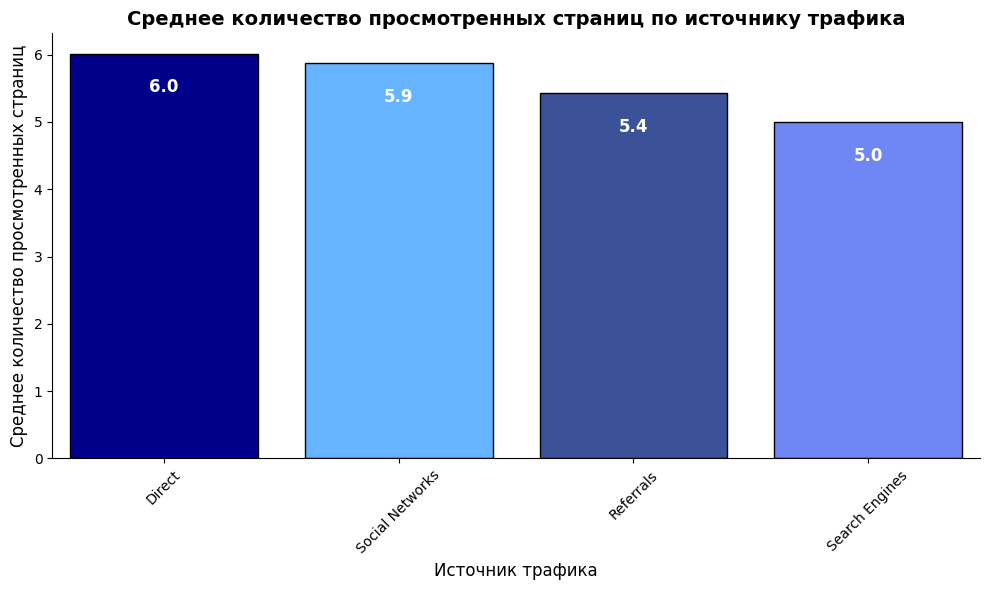

In [ ]:
# Шаг 1: Агрегируем данные по источнику трафика, вычисляя среднее количество просмотренных страниц
trafficsource_pages = df.groupby('trafficsource').agg({'pagesviewed': 'mean'}).sort_values('pagesviewed', ascending=False)

# Шаг 3: Добавляем столбец 'color' в DataFrame trafficsource_pages, чтобы присвоить цвета по источнику трафика
trafficsource_pages['color'] = trafficsource_pages.index.map(lambda x: trafficsource_colors.get(x, contrast_colors[0]))  # Если источник трафика не указан, применяем первый цвет

# Шаг 4: Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# График: столбчатая диаграмма по источнику трафика
bars = ax.bar(trafficsource_pages.index, trafficsource_pages['pagesviewed'], color=trafficsource_pages['color'], edgecolor='black')

# Настройки графика
ax.set_title("Среднее количество просмотренных страниц по источнику трафика", fontsize=14, fontweight='bold')
ax.set_xlabel("Источник трафика", fontsize=12)
ax.set_ylabel("Среднее количество просмотренных страниц", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.margins(x=0.02)

# Убираем верхнюю и правую рамки
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем подписи с количеством просмотренных страниц внутри столбцов
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 0.5, f"{height:.1f}", ha='center', va='center', fontsize=12, color='white', fontweight='bold')

# Отображение графика
plt.tight_layout()
plt.show()


**Среднее количество просмотренных страниц:**

- **Direct** — 6.02 страниц
- **Referrals** — 5.42 страниц
- **Search Engines** — 5.00 страниц
- **Social Networks** — 5.88 страниц

**Вывод**: Пользователи, пришедшие через **Direct** (6.02 страницы), просматривают больше страниц, чем другие сегменты.

**Рекомендация**: Стоит исследовать поведение пользователей с **поисковых систем** и **рефералов**, чтобы улучшить вовлеченность и количество просмотренных страниц, возможно, через улучшение навигации или контента.

### 4.3. Общее количество покупок

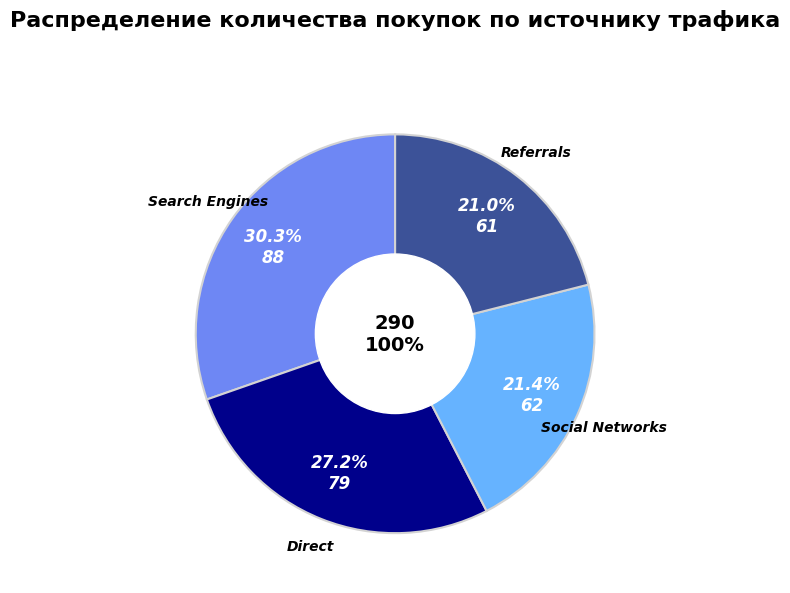

In [ ]:
# Функция для построения кольцевой диаграммы
def plot_donut(ax, data, title):
    # Считаем общий объем покупок
    total_purchases = data['purchases'].sum()

    # Построение кольцевой диаграммы
    wedges, texts = ax.pie(
        data['purchases'],
        labels=None,
        colors=data['color'],
        wedgeprops={'edgecolor': 'lightgray', 'linewidth': 1.5},
        startangle=90,
        radius=1.0
    )

    # Добавляем внутренний круг для эффекта кольцевой диаграммы
    center_circle = plt.Circle((0, 0), 0.4, color='white')
    ax.add_artist(center_circle)

    # Общая надпись в центре диаграммы
    ax.text(0, 0, f"{total_purchases}\n100%", ha='center', va='center', fontsize=14, fontweight='bold', color='black')

    # Располагаем подписи внутри сегментов
    for i, wedge in enumerate(wedges):
        # Рассчитываем угол для каждой секции
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.75 * wedge.r * np.cos(np.radians(angle))
        y = 0.75 * wedge.r * np.sin(np.radians(angle))

        # Рассчитываем процент покупок по источнику трафика
        purchases = data['purchases'].iloc[i]
        percent = (purchases / total_purchases) * 100

        # Подпись с процентом и количеством покупок
        value_label = f"{percent:.1f}%\n{purchases}"
        ax.text(x, y, value_label, ha='center', va='center', fontsize=12, fontweight='bold', color='white', style='italic')

        # Название источника трафика
        name_label = data.index[i]  # Название по источнику трафика
        rotation = 0  # Без наклона по источнику трафика

        # Подпись с названием источника трафика
        outer_x = 1.15 * wedge.r * np.cos(np.radians(angle))
        outer_y = 1.15 * wedge.r * np.sin(np.radians(angle))
        ax.text(outer_x, outer_y, name_label, ha='center', va='center', fontsize=10, fontweight='bold', color='black', style='italic', rotation=rotation)

    # Заголовок диаграммы
    ax.set_title(title, fontsize=16, fontweight='bold', y=1.1)

# Шаг 1: Агрегируем данные по источнику трафика и сортируем по количеству покупок
top_trafficsource = df.groupby('trafficsource').agg({'purchases': 'sum'})  # Агрегируем только по покупкам
top_trafficsource = top_trafficsource.sort_values(by='purchases', ascending=False)

# Применяем цвета по источнику трафика из словаря device_colors
top_trafficsource['color'] = top_trafficsource.index.map(trafficsource_colors).fillna(contrast_colors[0])

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(10, 6))

# График: Кольцевая диаграмма по источнику трафика
plot_donut(ax, top_trafficsource, "Распределение количества покупок по источнику трафика")

# Отображение графика
plt.tight_layout()
plt.show()


**Общее количество покупок:**

- **Direct** — 79 покупок
- **Referrals** — 61 покупка
- **Search Engines** — 88 покупок
- **Social Networks** — 62 покупки

**Вывод**: Наибольшее количество покупок зафиксировано у пользователей, пришедших через **Search Engines** (88 покупок), что может свидетельствовать о высоком интересе и готовности к покупке.

**Рекомендация**: Для увеличения покупок стоит усилить каналы **рефералов** и **социальных сетей**, где количество покупок ниже. Возможные улучшения могут включать таргетированную рекламу или специальные предложения для этих источников.

### 4.4. Конверсия (отношение количества покупок к количеству добавлений в корзину)


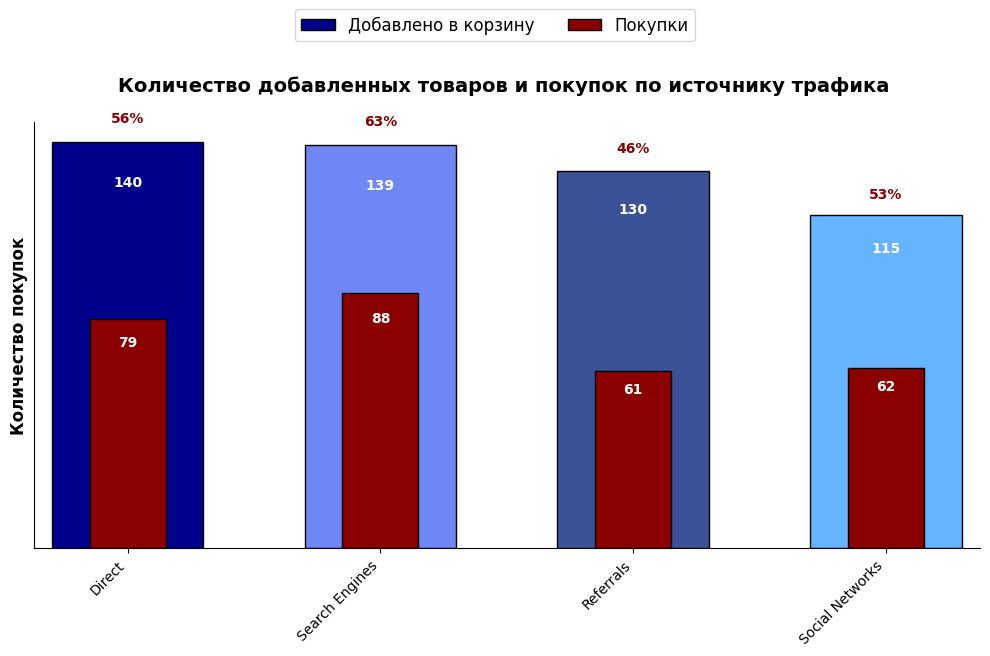

In [ ]:
# Агрегируем данные по типам устройств
trafficsource_data = df.groupby('trafficsource').agg({'purchases': 'sum', 'itemsincart': 'sum'})
trafficsource_data['conversion'] = (trafficsource_data['purchases'] / trafficsource_data['itemsincart']) * 100

# Сортируем по количеству товаров в корзине и отбираем топ-10 типов устройств
top_trafficsource = trafficsource_data.sort_values('itemsincart', ascending=False).head(10)

# Присваиваем цвета для типов устройств из словаря trafficsource_colors
top_trafficsource['color'] = top_trafficsource.index.map(trafficsource_colors)

# Построение графика
fig, ax = plt.subplots(figsize=(10, 6))

# Функция для построения столбчатого графика
def plot_bars(ax, data, title):
    bar_width = 0.6  # Ширина внешних столбцов
    inner_bar_width = 0.3  # Ширина внутренних столбцов
    indices = np.arange(len(data))  # Индексы для оси X

    # Внешний столбец — количество добавленных в корзину
    bars_outer = ax.bar(indices, data['itemsincart'], color=data['color'], edgecolor='black', width=bar_width, label='Добавлено в корзину')

    # Внутренний столбец — количество покупок
    bars_inner = ax.bar(indices, data['purchases'], color='darkred', edgecolor='black', width=inner_bar_width, label='Покупки')

    # Подписи внутри внешних столбцов (для количества товаров в корзине)
    for i, (items, purchases) in enumerate(zip(data['itemsincart'], data['purchases'])):
        ax.text(i, items - 0.1 * items, f"{int(items)}", ha='center', va='center', color='white', fontweight='bold')
        ax.text(i, purchases - 0.1 * purchases, f"{int(purchases)}", ha='center', va='center', color='white', fontweight='bold')

    # Подписи конверсии сверху столбцов
    for i, conversion in enumerate(data['conversion']):
        ax.text(i, data['itemsincart'].iloc[i] + 0.05 * data['itemsincart'].iloc[i],
                f"{int(conversion)}%", ha='center', color='darkred', fontweight='bold')

    # Настройка оси X (показываем названия типов устройств на оси)
    ax.set_xticks(indices)
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel("Количество покупок", fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.margins(x=0.02)

    # Убираем верхнюю и правую рамки графика
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Убираем оси Y
    ax.set_yticks([])

# Построение графика по источнику трафика
plot_bars(ax, top_trafficsource, "Количество добавленных товаров и покупок по источнику трафика \n")

# Добавление общей легенды сверху графиков
fig.legend(["Добавлено в корзину", "Покупки", "Конверсия (%)"],
           loc='upper center', fontsize=12, ncol=4, bbox_to_anchor=(0.5, 1.1))

# Отображение графика
plt.tight_layout()
plt.show()


**Конверсия (отношение покупок к добавлениям в корзину):**

- **Direct** — 0.56
- **Referrals** — 0.47
- **Search Engines** — 0.63
- **Social Networks** — 0.54

**Вывод**: Наивысшая конверсия наблюдается у пользователей из **поисковых систем** (0.63), что говорит о высоком уровне завершения покупок. **Рефералы** имеют самую низкую конверсию (0.47).

**Рекомендация**: Для улучшения конверсии стоит изучить опыт пользователей **рефералов** и **социальных сетей** с целью оптимизации процесса покупки, например, через улучшение вовлеченности на страницах или упрощение этапов оформления заказа.

## **Итоговые выводы и рекомендации**

### **Итоговые выводы**
1. **Среднее время, проведенное на сайте**:
   - Пользователи из **Ванкувера (Канада)**, **Торонто (Канада)** и посетители с **ноутбуков** демонстрируют наибольшее время нахождения на сайте, что говорит об их высокой вовлеченности.
   - Меньше всего времени проводят пользователи **планшетов**, **смартфонов**, а также пользователи из городов **Монреаль (Канада)** и **Лион (Франция)**.
   - Среди источников трафика, лидируют пользователи из **социальных сетей**, тогда как рефералы показывают меньшую вовлеченность.

2. **Среднее количество просмотренных страниц**:
   - Пользователи из **Чикаго (США)** и **Торонто (Канада)** просматривают больше всего страниц, что может свидетельствовать о лучшем пользовательском опыте в этих регионах.
   - Наименьшие показатели по просмотру страниц у **Ванкувера (Канада)** и **Лиона (Франция)**, что может быть связано с недостаточным интересом к контенту.
   - Посетители с **смартфонов** и из **поисковых систем** демонстрируют высокую активность, а пользователи с **планшетов** — ниже.

3. **Общее количество покупок**:
   - Наибольшее количество покупок наблюдается у пользователей с **ноутбуков**, через **поисковые системы**, а также из **Торонто (Канада)** и **Нью-Йорка (США)**.
   - Низкое количество покупок у пользователей с **планшетов**, из **рефералов**, а также в городах **Монреаль (Канада)** и **Лион (Франция)**.

4. **Конверсия**:
   - Лучшие показатели конверсии у пользователей **Windows**, а также у посетителей через **поисковые системы**, особенно в городах **Берлин (Германия)** и **Дели (Индия)**.
   - Низкая конверсия наблюдается у пользователей **Android**, из **рефералов**, а также в городах **Марсель (Франция)** и **Монреаль (Канада)**.

### **Итоговые рекомендации**
1. **Улучшение мобильной версии сайта**:
   - Оптимизировать интерфейс для пользователей **планшетов** и **смартфонов**, учитывая их низкое среднее время на сайте и меньшее количество просмотренных страниц. Улучшение мобильного опыта может повысить показатели вовлеченности и покупок.

2. **Целевая работа с регионами с низкими показателями**:
   - Необходимо сосредоточиться на улучшении опыта пользователей в городах **Монреаль (Канада)** и **Лион (Франция)**, где наблюдаются низкие показатели времени на сайте, просмотров страниц и конверсии. Проведение локализованных маркетинговых кампаний и улучшение контента для этих регионов может помочь увеличить конверсию.

3. **Оптимизация каналов привлечения пользователей**:
   - Повышение эффективности **реферального трафика** необходимо для увеличения конверсии и общего числа покупок. Это можно достичь с помощью улучшения партнерских предложений и создания привлекательных акций для новых пользователей.
   - Усилить рекламные кампании через **поисковые системы**, которые показывают высокие показатели конверсии и общего числа покупок.

4. **Фокус на аудиторию пользователей ноутбуков и Windows**:
   - Учитывая высокую конверсию и вовлеченность пользователей **ноутбуков** и **Windows**, стоит направить дополнительные маркетинговые усилия на привлечение и удержание этой аудитории. Это может включать специальные предложения и персонализированные акции.

5. **Улучшение контента и навигации на сайте**:
   - Учитывая, что пользователи из **Чикаго (США)** и **Торонто (Канада)** показывают высокое количество просмотров страниц, а пользователи из **Ванкувера (Канада)** и **Лиона (Франция)** — низкое, стоит пересмотреть структуру и содержание сайта для регионов с низкой активностью, чтобы стимулировать более глубокий просмотр контента.

---

Данные выводы и рекомендации основаны на комплексном анализе всех показателей и сегментов, что позволяет компании принимать более обоснованные решения для улучшения пользовательского опыта и оценки эффективности работы с различными клиентами. **Результаты анализа также наглядно представлены в виде графиков, что позволяет легко интерпретировать данные и выявлять ключевые тенденции по каждому сегменту.**